## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   3.477256   918.776538  0.773779   9.886239  1.792516
1  46.323715   317.373931  0.098135   4.424864  0.675265
2  85.433999   809.908997  0.329461   9.364297  1.119768
3  10.344086  1708.454619  0.838339  10.001504  1.546625
4  57.058626   635.740705  0.525137   9.261685  1.403309


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.21029 | train_mse: 3.44046 | train_mae: 1.38897 |  0:00:00s
epoch 1  | loss: 1.42085 | train_mse: 2.70812 | train_mae: 1.28557 |  0:00:00s


epoch 2  | loss: 1.17159 | train_mse: 2.61213 | train_mae: 1.28593 |  0:00:00s


epoch 3  | loss: 1.17327 | train_mse: 2.3313  | train_mae: 1.22414 |  0:00:00s
epoch 4  | loss: 1.27483 | train_mse: 2.06914 | train_mae: 1.13125 |  0:00:01s


epoch 5  | loss: 1.12022 | train_mse: 1.91057 | train_mae: 1.10119 |  0:00:01s
epoch 6  | loss: 0.99892 | train_mse: 1.69693 | train_mae: 1.04028 |  0:00:01s


epoch 7  | loss: 0.94296 | train_mse: 1.50557 | train_mae: 0.98469 |  0:00:01s


epoch 8  | loss: 0.85032 | train_mse: 1.38378 | train_mae: 0.94036 |  0:00:01s
epoch 9  | loss: 0.82173 | train_mse: 1.27371 | train_mae: 0.89511 |  0:00:01s


epoch 10 | loss: 1.10698 | train_mse: 1.22139 | train_mae: 0.86667 |  0:00:02s
epoch 11 | loss: 0.83208 | train_mse: 1.11936 | train_mae: 0.82319 |  0:00:02s


epoch 12 | loss: 0.90934 | train_mse: 1.03489 | train_mae: 0.77925 |  0:00:02s
epoch 13 | loss: 0.72414 | train_mse: 0.95474 | train_mae: 0.73728 |  0:00:02s


epoch 14 | loss: 0.77422 | train_mse: 0.88032 | train_mae: 0.70155 |  0:00:02s
epoch 15 | loss: 0.65229 | train_mse: 0.83766 | train_mae: 0.67866 |  0:00:02s


epoch 16 | loss: 0.73405 | train_mse: 0.79134 | train_mae: 0.65336 |  0:00:03s
epoch 17 | loss: 0.75302 | train_mse: 0.75412 | train_mae: 0.63294 |  0:00:03s


epoch 18 | loss: 0.71733 | train_mse: 0.7195  | train_mae: 0.61438 |  0:00:03s
epoch 19 | loss: 0.721   | train_mse: 0.6897  | train_mae: 0.60423 |  0:00:03s


epoch 20 | loss: 0.7537  | train_mse: 0.67175 | train_mae: 0.59877 |  0:00:03s
epoch 21 | loss: 0.60795 | train_mse: 0.64624 | train_mae: 0.59434 |  0:00:03s


epoch 22 | loss: 0.69397 | train_mse: 0.61849 | train_mae: 0.58708 |  0:00:03s


epoch 23 | loss: 0.65502 | train_mse: 0.58171 | train_mae: 0.5735  |  0:00:04s
epoch 24 | loss: 0.58374 | train_mse: 0.56402 | train_mae: 0.56899 |  0:00:04s


epoch 25 | loss: 0.55565 | train_mse: 0.5405  | train_mae: 0.56155 |  0:00:04s


epoch 26 | loss: 0.60136 | train_mse: 0.51423 | train_mae: 0.54899 |  0:00:04s
epoch 27 | loss: 0.66567 | train_mse: 0.5032  | train_mae: 0.53841 |  0:00:04s


epoch 28 | loss: 0.61782 | train_mse: 0.49665 | train_mae: 0.53102 |  0:00:04s


epoch 29 | loss: 0.52268 | train_mse: 0.49039 | train_mae: 0.5163  |  0:00:05s
epoch 30 | loss: 0.42522 | train_mse: 0.48101 | train_mae: 0.51306 |  0:00:05s


epoch 31 | loss: 0.49865 | train_mse: 0.4759  | train_mae: 0.51175 |  0:00:05s
epoch 32 | loss: 0.46594 | train_mse: 0.46506 | train_mae: 0.50603 |  0:00:05s


epoch 33 | loss: 0.49866 | train_mse: 0.46356 | train_mae: 0.50366 |  0:00:05s
epoch 34 | loss: 0.68379 | train_mse: 0.45289 | train_mae: 0.49474 |  0:00:06s


epoch 35 | loss: 0.44715 | train_mse: 0.44285 | train_mae: 0.48401 |  0:00:06s


epoch 36 | loss: 0.70055 | train_mse: 0.43533 | train_mae: 0.48049 |  0:00:06s
epoch 37 | loss: 0.47913 | train_mse: 0.43964 | train_mae: 0.48502 |  0:00:06s


epoch 38 | loss: 0.36738 | train_mse: 0.43569 | train_mae: 0.48184 |  0:00:06s
epoch 39 | loss: 0.601   | train_mse: 0.42692 | train_mae: 0.47884 |  0:00:06s


epoch 40 | loss: 0.54246 | train_mse: 0.41412 | train_mae: 0.47507 |  0:00:07s
epoch 41 | loss: 0.36384 | train_mse: 0.40905 | train_mae: 0.47052 |  0:00:07s


epoch 42 | loss: 0.35802 | train_mse: 0.39051 | train_mae: 0.46199 |  0:00:07s
epoch 43 | loss: 0.50294 | train_mse: 0.37563 | train_mae: 0.4556  |  0:00:07s


epoch 44 | loss: 0.31216 | train_mse: 0.36201 | train_mae: 0.44838 |  0:00:07s
epoch 45 | loss: 0.55731 | train_mse: 0.34757 | train_mae: 0.44067 |  0:00:07s


epoch 46 | loss: 0.32705 | train_mse: 0.33826 | train_mae: 0.43409 |  0:00:08s
epoch 47 | loss: 0.36875 | train_mse: 0.3398  | train_mae: 0.43297 |  0:00:08s


epoch 48 | loss: 0.53358 | train_mse: 0.34024 | train_mae: 0.42944 |  0:00:08s
epoch 49 | loss: 0.38641 | train_mse: 0.3415  | train_mae: 0.41994 |  0:00:08s


epoch 50 | loss: 0.48045 | train_mse: 0.33362 | train_mae: 0.40422 |  0:00:08s


epoch 51 | loss: 0.34888 | train_mse: 0.3305  | train_mae: 0.39768 |  0:00:09s
epoch 52 | loss: 0.31239 | train_mse: 0.3217  | train_mae: 0.39391 |  0:00:09s


epoch 53 | loss: 0.38904 | train_mse: 0.30372 | train_mae: 0.38404 |  0:00:09s
epoch 54 | loss: 0.40321 | train_mse: 0.28897 | train_mae: 0.37669 |  0:00:09s
epoch 55 | loss: 0.42428 | train_mse: 0.26027 | train_mae: 0.36866 |  0:00:09s


epoch 56 | loss: 0.44392 | train_mse: 0.23773 | train_mae: 0.35997 |  0:00:09s
epoch 57 | loss: 0.28785 | train_mse: 0.22378 | train_mae: 0.35394 |  0:00:09s


epoch 58 | loss: 0.36607 | train_mse: 0.21112 | train_mae: 0.34795 |  0:00:09s
epoch 59 | loss: 0.25344 | train_mse: 0.20845 | train_mae: 0.35083 |  0:00:09s


epoch 60 | loss: 0.35251 | train_mse: 0.2136  | train_mae: 0.35743 |  0:00:09s
epoch 61 | loss: 0.42467 | train_mse: 0.21595 | train_mae: 0.35857 |  0:00:10s
epoch 62 | loss: 0.51622 | train_mse: 0.21347 | train_mae: 0.35606 |  0:00:10s


epoch 63 | loss: 0.35189 | train_mse: 0.21313 | train_mae: 0.35602 |  0:00:10s
epoch 64 | loss: 0.3823  | train_mse: 0.22322 | train_mae: 0.35952 |  0:00:10s
epoch 65 | loss: 0.37895 | train_mse: 0.23464 | train_mae: 0.36028 |  0:00:10s


epoch 66 | loss: 0.32363 | train_mse: 0.24    | train_mae: 0.36    |  0:00:10s
epoch 67 | loss: 0.27998 | train_mse: 0.2393  | train_mae: 0.35571 |  0:00:10s
epoch 68 | loss: 0.24388 | train_mse: 0.23349 | train_mae: 0.35239 |  0:00:10s


epoch 69 | loss: 0.39256 | train_mse: 0.21343 | train_mae: 0.34878 |  0:00:10s
epoch 70 | loss: 0.40628 | train_mse: 0.21436 | train_mae: 0.34462 |  0:00:10s


epoch 71 | loss: 0.42598 | train_mse: 0.21666 | train_mae: 0.3411  |  0:00:10s
epoch 72 | loss: 0.29713 | train_mse: 0.22652 | train_mae: 0.34102 |  0:00:11s
epoch 73 | loss: 0.30483 | train_mse: 0.24294 | train_mae: 0.35068 |  0:00:11s


epoch 74 | loss: 0.50014 | train_mse: 0.25621 | train_mae: 0.35643 |  0:00:11s
epoch 75 | loss: 0.41329 | train_mse: 0.24815 | train_mae: 0.35027 |  0:00:11s
epoch 76 | loss: 0.45817 | train_mse: 0.24268 | train_mae: 0.35385 |  0:00:11s


epoch 77 | loss: 0.34271 | train_mse: 0.22248 | train_mae: 0.34055 |  0:00:11s
epoch 78 | loss: 0.2654  | train_mse: 0.21224 | train_mae: 0.33678 |  0:00:11s


epoch 79 | loss: 0.42657 | train_mse: 0.19933 | train_mae: 0.33303 |  0:00:11s
epoch 80 | loss: 0.45385 | train_mse: 0.19781 | train_mae: 0.33282 |  0:00:11s
epoch 81 | loss: 0.22557 | train_mse: 0.19357 | train_mae: 0.33084 |  0:00:11s


epoch 82 | loss: 0.35397 | train_mse: 0.18792 | train_mae: 0.32808 |  0:00:11s
epoch 83 | loss: 0.27188 | train_mse: 0.18558 | train_mae: 0.32519 |  0:00:12s
epoch 84 | loss: 0.43115 | train_mse: 0.18165 | train_mae: 0.32087 |  0:00:12s


epoch 85 | loss: 0.24308 | train_mse: 0.17862 | train_mae: 0.31731 |  0:00:12s
epoch 86 | loss: 0.28501 | train_mse: 0.17978 | train_mae: 0.3165  |  0:00:12s


epoch 87 | loss: 0.39391 | train_mse: 0.17696 | train_mae: 0.3118  |  0:00:12s
epoch 88 | loss: 0.35797 | train_mse: 0.17471 | train_mae: 0.3084  |  0:00:12s


epoch 89 | loss: 0.21568 | train_mse: 0.17525 | train_mae: 0.31142 |  0:00:12s
epoch 90 | loss: 0.3994  | train_mse: 0.17172 | train_mae: 0.30808 |  0:00:12s
epoch 91 | loss: 0.3052  | train_mse: 0.17118 | train_mae: 0.30929 |  0:00:12s


epoch 92 | loss: 0.30247 | train_mse: 0.16708 | train_mae: 0.30799 |  0:00:13s
epoch 93 | loss: 0.23959 | train_mse: 0.16423 | train_mae: 0.3066  |  0:00:13s


epoch 94 | loss: 0.34411 | train_mse: 0.16139 | train_mae: 0.30398 |  0:00:13s
epoch 95 | loss: 0.21577 | train_mse: 0.16191 | train_mae: 0.30506 |  0:00:13s
epoch 96 | loss: 0.32442 | train_mse: 0.16307 | train_mae: 0.30675 |  0:00:13s


epoch 97 | loss: 0.32755 | train_mse: 0.1692  | train_mae: 0.30997 |  0:00:13s
epoch 98 | loss: 0.34801 | train_mse: 0.17041 | train_mae: 0.31425 |  0:00:13s
epoch 99 | loss: 0.22582 | train_mse: 0.16737 | train_mae: 0.31171 |  0:00:13s


epoch 100| loss: 0.33464 | train_mse: 0.16463 | train_mae: 0.30408 |  0:00:13s


epoch 101| loss: 0.1878  | train_mse: 0.15906 | train_mae: 0.29922 |  0:00:13s
epoch 102| loss: 0.2884  | train_mse: 0.15736 | train_mae: 0.3029  |  0:00:13s
epoch 103| loss: 0.44764 | train_mse: 0.15983 | train_mae: 0.30353 |  0:00:14s


epoch 104| loss: 0.19489 | train_mse: 0.14801 | train_mae: 0.28893 |  0:00:14s
epoch 105| loss: 0.18617 | train_mse: 0.14066 | train_mae: 0.28288 |  0:00:14s
epoch 106| loss: 0.22633 | train_mse: 0.13478 | train_mae: 0.27623 |  0:00:14s


epoch 107| loss: 0.24349 | train_mse: 0.12994 | train_mae: 0.27172 |  0:00:14s
epoch 108| loss: 0.24004 | train_mse: 0.12959 | train_mae: 0.27518 |  0:00:14s


epoch 109| loss: 0.17266 | train_mse: 0.13036 | train_mae: 0.28209 |  0:00:14s
epoch 110| loss: 0.30458 | train_mse: 0.12374 | train_mae: 0.27448 |  0:00:14s
epoch 111| loss: 0.26108 | train_mse: 0.11997 | train_mae: 0.26701 |  0:00:14s


epoch 112| loss: 0.24282 | train_mse: 0.12162 | train_mae: 0.27202 |  0:00:14s
epoch 113| loss: 0.13664 | train_mse: 0.12584 | train_mae: 0.27366 |  0:00:15s
epoch 114| loss: 0.25729 | train_mse: 0.13077 | train_mae: 0.27878 |  0:00:15s


epoch 115| loss: 0.20598 | train_mse: 0.13997 | train_mae: 0.2886  |  0:00:15s
epoch 116| loss: 0.17243 | train_mse: 0.1461  | train_mae: 0.294   |  0:00:15s
epoch 117| loss: 0.2986  | train_mse: 0.14975 | train_mae: 0.29448 |  0:00:15s


epoch 118| loss: 0.34851 | train_mse: 0.15298 | train_mae: 0.29251 |  0:00:15s
epoch 119| loss: 0.22649 | train_mse: 0.16071 | train_mae: 0.29268 |  0:00:15s
epoch 120| loss: 0.31084 | train_mse: 0.17343 | train_mae: 0.29399 |  0:00:15s


epoch 121| loss: 0.18798 | train_mse: 0.17993 | train_mae: 0.29338 |  0:00:15s
epoch 122| loss: 0.17947 | train_mse: 0.18104 | train_mae: 0.28963 |  0:00:15s
epoch 123| loss: 0.28437 | train_mse: 0.1794  | train_mae: 0.28743 |  0:00:15s


epoch 124| loss: 0.21424 | train_mse: 0.17428 | train_mae: 0.28424 |  0:00:16s
epoch 125| loss: 0.25346 | train_mse: 0.17872 | train_mae: 0.29121 |  0:00:16s
epoch 126| loss: 0.36941 | train_mse: 0.16369 | train_mae: 0.28367 |  0:00:16s


epoch 127| loss: 0.23921 | train_mse: 0.15123 | train_mae: 0.2812  |  0:00:16s
epoch 128| loss: 0.19713 | train_mse: 0.12965 | train_mae: 0.26571 |  0:00:16s
epoch 129| loss: 0.30486 | train_mse: 0.12847 | train_mae: 0.25981 |  0:00:16s


epoch 130| loss: 0.15595 | train_mse: 0.12719 | train_mae: 0.26044 |  0:00:16s
epoch 131| loss: 0.29484 | train_mse: 0.12651 | train_mae: 0.26137 |  0:00:16s


epoch 132| loss: 0.31708 | train_mse: 0.13031 | train_mae: 0.26421 |  0:00:16s
epoch 133| loss: 0.31369 | train_mse: 0.13379 | train_mae: 0.26893 |  0:00:16s
epoch 134| loss: 0.4317  | train_mse: 0.13479 | train_mae: 0.27064 |  0:00:17s


epoch 135| loss: 0.31159 | train_mse: 0.13876 | train_mae: 0.27376 |  0:00:17s
epoch 136| loss: 0.21499 | train_mse: 0.1408  | train_mae: 0.276   |  0:00:17s
epoch 137| loss: 0.23365 | train_mse: 0.14168 | train_mae: 0.28031 |  0:00:17s


epoch 138| loss: 0.20369 | train_mse: 0.13751 | train_mae: 0.27861 |  0:00:17s
epoch 139| loss: 0.28966 | train_mse: 0.136   | train_mae: 0.27566 |  0:00:17s
epoch 140| loss: 0.30793 | train_mse: 0.13748 | train_mae: 0.27716 |  0:00:17s


epoch 141| loss: 0.19814 | train_mse: 0.12951 | train_mae: 0.26872 |  0:00:17s
epoch 142| loss: 0.21006 | train_mse: 0.1239  | train_mae: 0.26338 |  0:00:17s
epoch 143| loss: 0.23267 | train_mse: 0.12229 | train_mae: 0.26013 |  0:00:17s


epoch 144| loss: 0.21009 | train_mse: 0.12605 | train_mae: 0.26174 |  0:00:18s
epoch 145| loss: 0.2294  | train_mse: 0.12828 | train_mae: 0.26552 |  0:00:18s
epoch 146| loss: 0.38945 | train_mse: 0.13244 | train_mae: 0.26959 |  0:00:18s


epoch 147| loss: 0.15843 | train_mse: 0.13578 | train_mae: 0.27537 |  0:00:18s
epoch 148| loss: 0.22159 | train_mse: 0.12963 | train_mae: 0.2721  |  0:00:18s
epoch 149| loss: 0.15139 | train_mse: 0.1218  | train_mae: 0.26495 |  0:00:18s


epoch 150| loss: 0.15712 | train_mse: 0.11905 | train_mae: 0.26326 |  0:00:18s
epoch 151| loss: 0.23273 | train_mse: 0.11583 | train_mae: 0.26189 |  0:00:18s


epoch 152| loss: 0.16217 | train_mse: 0.11196 | train_mae: 0.25722 |  0:00:18s
epoch 153| loss: 0.11492 | train_mse: 0.10772 | train_mae: 0.25193 |  0:00:18s


epoch 154| loss: 0.43395 | train_mse: 0.10574 | train_mae: 0.2499  |  0:00:18s
epoch 155| loss: 0.31609 | train_mse: 0.10303 | train_mae: 0.24708 |  0:00:19s
epoch 156| loss: 0.18244 | train_mse: 0.10002 | train_mae: 0.24513 |  0:00:19s


epoch 157| loss: 0.19351 | train_mse: 0.10097 | train_mae: 0.24681 |  0:00:19s
epoch 158| loss: 0.26739 | train_mse: 0.1     | train_mae: 0.24585 |  0:00:19s
epoch 159| loss: 0.20806 | train_mse: 0.10992 | train_mae: 0.25507 |  0:00:19s


epoch 160| loss: 0.20015 | train_mse: 0.11212 | train_mae: 0.2584  |  0:00:19s
epoch 161| loss: 0.27196 | train_mse: 0.11016 | train_mae: 0.25561 |  0:00:19s


epoch 162| loss: 0.1664  | train_mse: 0.10531 | train_mae: 0.25019 |  0:00:19s
epoch 163| loss: 0.17733 | train_mse: 0.10113 | train_mae: 0.24566 |  0:00:19s
epoch 164| loss: 0.16726 | train_mse: 0.10031 | train_mae: 0.24262 |  0:00:19s


epoch 165| loss: 0.16748 | train_mse: 0.10088 | train_mae: 0.24133 |  0:00:19s
epoch 166| loss: 0.23576 | train_mse: 0.09874 | train_mae: 0.23932 |  0:00:20s
epoch 167| loss: 0.19906 | train_mse: 0.09707 | train_mae: 0.23743 |  0:00:20s


epoch 168| loss: 0.15029 | train_mse: 0.09622 | train_mae: 0.23501 |  0:00:20s
epoch 169| loss: 0.19779 | train_mse: 0.09576 | train_mae: 0.23608 |  0:00:20s
epoch 170| loss: 0.42123 | train_mse: 0.09442 | train_mae: 0.23872 |  0:00:20s


epoch 171| loss: 0.13923 | train_mse: 0.09699 | train_mae: 0.24455 |  0:00:20s
epoch 172| loss: 0.15264 | train_mse: 0.10211 | train_mae: 0.24841 |  0:00:20s


epoch 173| loss: 0.18262 | train_mse: 0.10338 | train_mae: 0.25082 |  0:00:20s
epoch 174| loss: 0.2777  | train_mse: 0.10181 | train_mae: 0.25282 |  0:00:20s
epoch 175| loss: 0.13714 | train_mse: 0.10348 | train_mae: 0.25455 |  0:00:20s


epoch 176| loss: 0.13364 | train_mse: 0.10371 | train_mae: 0.25403 |  0:00:21s
epoch 177| loss: 0.19846 | train_mse: 0.10215 | train_mae: 0.25332 |  0:00:21s
epoch 178| loss: 0.20169 | train_mse: 0.10324 | train_mae: 0.25467 |  0:00:21s


epoch 179| loss: 0.24637 | train_mse: 0.10573 | train_mae: 0.25703 |  0:00:21s
epoch 180| loss: 0.09893 | train_mse: 0.10484 | train_mae: 0.25573 |  0:00:21s
epoch 181| loss: 0.14964 | train_mse: 0.10276 | train_mae: 0.25188 |  0:00:21s


epoch 182| loss: 0.21261 | train_mse: 0.10341 | train_mae: 0.25327 |  0:00:21s
epoch 183| loss: 0.13658 | train_mse: 0.10331 | train_mae: 0.25145 |  0:00:21s


epoch 184| loss: 0.18863 | train_mse: 0.09639 | train_mae: 0.24482 |  0:00:21s
epoch 185| loss: 0.1999  | train_mse: 0.09259 | train_mae: 0.23793 |  0:00:21s
epoch 186| loss: 0.09996 | train_mse: 0.09216 | train_mae: 0.23667 |  0:00:21s


epoch 187| loss: 0.15841 | train_mse: 0.09189 | train_mae: 0.23636 |  0:00:22s
epoch 188| loss: 0.20236 | train_mse: 0.09365 | train_mae: 0.24231 |  0:00:22s
epoch 189| loss: 0.27733 | train_mse: 0.093   | train_mae: 0.24126 |  0:00:22s


epoch 190| loss: 0.17164 | train_mse: 0.09572 | train_mae: 0.24404 |  0:00:22s
epoch 191| loss: 0.40295 | train_mse: 0.09985 | train_mae: 0.24931 |  0:00:22s
epoch 192| loss: 0.11563 | train_mse: 0.09692 | train_mae: 0.24251 |  0:00:22s


epoch 193| loss: 0.15956 | train_mse: 0.09699 | train_mae: 0.23757 |  0:00:22s
epoch 194| loss: 0.12845 | train_mse: 0.09504 | train_mae: 0.23314 |  0:00:22s


epoch 195| loss: 0.33532 | train_mse: 0.09032 | train_mae: 0.22674 |  0:00:22s
epoch 196| loss: 0.13679 | train_mse: 0.08487 | train_mae: 0.21832 |  0:00:22s
epoch 197| loss: 0.14097 | train_mse: 0.08443 | train_mae: 0.21772 |  0:00:23s


epoch 198| loss: 0.25969 | train_mse: 0.08547 | train_mae: 0.22334 |  0:00:23s
epoch 199| loss: 0.17096 | train_mse: 0.08756 | train_mae: 0.22635 |  0:00:23s
epoch 200| loss: 0.13163 | train_mse: 0.08662 | train_mae: 0.22813 |  0:00:23s


epoch 201| loss: 0.2857  | train_mse: 0.08788 | train_mae: 0.23086 |  0:00:23s
epoch 202| loss: 0.30292 | train_mse: 0.08877 | train_mae: 0.23155 |  0:00:23s
epoch 203| loss: 0.20098 | train_mse: 0.09072 | train_mae: 0.23194 |  0:00:23s


epoch 204| loss: 0.1817  | train_mse: 0.09083 | train_mae: 0.23235 |  0:00:23s
epoch 205| loss: 0.15073 | train_mse: 0.09091 | train_mae: 0.23237 |  0:00:23s


epoch 206| loss: 0.13685 | train_mse: 0.09139 | train_mae: 0.23627 |  0:00:23s
epoch 207| loss: 0.1217  | train_mse: 0.0896  | train_mae: 0.236   |  0:00:23s
epoch 208| loss: 0.1808  | train_mse: 0.08818 | train_mae: 0.2334  |  0:00:24s


epoch 209| loss: 0.17353 | train_mse: 0.08834 | train_mae: 0.23134 |  0:00:24s
epoch 210| loss: 0.14942 | train_mse: 0.08536 | train_mae: 0.22839 |  0:00:24s
epoch 211| loss: 0.13499 | train_mse: 0.08438 | train_mae: 0.22634 |  0:00:24s


epoch 212| loss: 0.25758 | train_mse: 0.0812  | train_mae: 0.22074 |  0:00:24s
epoch 213| loss: 0.16379 | train_mse: 0.07569 | train_mae: 0.21501 |  0:00:24s
epoch 214| loss: 0.19732 | train_mse: 0.07304 | train_mae: 0.2117  |  0:00:24s


epoch 215| loss: 0.19875 | train_mse: 0.07516 | train_mae: 0.21708 |  0:00:24s
epoch 216| loss: 0.26913 | train_mse: 0.07856 | train_mae: 0.22284 |  0:00:24s
epoch 217| loss: 0.16477 | train_mse: 0.08261 | train_mae: 0.22945 |  0:00:24s


epoch 218| loss: 0.4359  | train_mse: 0.08374 | train_mae: 0.23164 |  0:00:24s
epoch 219| loss: 0.20554 | train_mse: 0.08601 | train_mae: 0.2337  |  0:00:25s
epoch 220| loss: 0.10638 | train_mse: 0.08531 | train_mae: 0.23254 |  0:00:25s


epoch 221| loss: 0.11469 | train_mse: 0.08674 | train_mae: 0.23281 |  0:00:25s
epoch 222| loss: 0.19714 | train_mse: 0.0903  | train_mae: 0.2355  |  0:00:25s
epoch 223| loss: 0.10039 | train_mse: 0.08905 | train_mae: 0.23619 |  0:00:25s


epoch 224| loss: 0.26995 | train_mse: 0.09025 | train_mae: 0.23871 |  0:00:25s
epoch 225| loss: 0.12558 | train_mse: 0.08986 | train_mae: 0.23881 |  0:00:25s


epoch 226| loss: 0.13792 | train_mse: 0.08776 | train_mae: 0.23712 |  0:00:25s
epoch 227| loss: 0.19791 | train_mse: 0.08746 | train_mae: 0.23614 |  0:00:26s


epoch 228| loss: 0.13058 | train_mse: 0.08655 | train_mae: 0.23327 |  0:00:26s
epoch 229| loss: 0.17943 | train_mse: 0.08583 | train_mae: 0.23042 |  0:00:26s


epoch 230| loss: 0.16789 | train_mse: 0.08799 | train_mae: 0.23496 |  0:00:26s
epoch 231| loss: 0.24038 | train_mse: 0.08491 | train_mae: 0.23104 |  0:00:26s


epoch 232| loss: 0.09063 | train_mse: 0.08353 | train_mae: 0.22963 |  0:00:26s
epoch 233| loss: 0.26518 | train_mse: 0.08554 | train_mae: 0.23155 |  0:00:26s


epoch 234| loss: 0.13485 | train_mse: 0.08614 | train_mae: 0.23266 |  0:00:26s
epoch 235| loss: 0.13546 | train_mse: 0.08546 | train_mae: 0.23007 |  0:00:26s
epoch 236| loss: 0.28876 | train_mse: 0.08607 | train_mae: 0.23155 |  0:00:27s


epoch 237| loss: 0.20369 | train_mse: 0.08976 | train_mae: 0.23736 |  0:00:27s
epoch 238| loss: 0.11028 | train_mse: 0.09044 | train_mae: 0.23806 |  0:00:27s
epoch 239| loss: 0.18027 | train_mse: 0.08901 | train_mae: 0.23554 |  0:00:27s


epoch 240| loss: 0.10251 | train_mse: 0.08804 | train_mae: 0.23403 |  0:00:27s
epoch 241| loss: 0.11693 | train_mse: 0.08334 | train_mae: 0.22841 |  0:00:27s
epoch 242| loss: 0.08368 | train_mse: 0.08214 | train_mae: 0.22601 |  0:00:27s


epoch 243| loss: 0.09905 | train_mse: 0.08009 | train_mae: 0.22096 |  0:00:27s
epoch 244| loss: 0.13971 | train_mse: 0.07732 | train_mae: 0.21728 |  0:00:27s


epoch 245| loss: 0.28101 | train_mse: 0.07334 | train_mae: 0.21348 |  0:00:27s
epoch 246| loss: 0.19785 | train_mse: 0.07161 | train_mae: 0.2129  |  0:00:28s
epoch 247| loss: 0.31236 | train_mse: 0.07064 | train_mae: 0.21313 |  0:00:28s


epoch 248| loss: 0.13609 | train_mse: 0.07373 | train_mae: 0.21692 |  0:00:28s
epoch 249| loss: 0.12685 | train_mse: 0.07239 | train_mae: 0.2154  |  0:00:28s
epoch 250| loss: 0.15507 | train_mse: 0.07769 | train_mae: 0.22351 |  0:00:28s


epoch 251| loss: 0.16801 | train_mse: 0.07528 | train_mae: 0.2199  |  0:00:28s
epoch 252| loss: 0.349   | train_mse: 0.07131 | train_mae: 0.21339 |  0:00:28s


epoch 253| loss: 0.43703 | train_mse: 0.07095 | train_mae: 0.21192 |  0:00:28s
epoch 254| loss: 0.1474  | train_mse: 0.07009 | train_mae: 0.20785 |  0:00:28s


epoch 255| loss: 0.10653 | train_mse: 0.07485 | train_mae: 0.21237 |  0:00:28s
epoch 256| loss: 0.1122  | train_mse: 0.08416 | train_mae: 0.22619 |  0:00:29s
epoch 257| loss: 0.10636 | train_mse: 0.08773 | train_mae: 0.22945 |  0:00:29s


epoch 258| loss: 0.18224 | train_mse: 0.09049 | train_mae: 0.23393 |  0:00:29s
epoch 259| loss: 0.19031 | train_mse: 0.08839 | train_mae: 0.23166 |  0:00:29s
epoch 260| loss: 0.15419 | train_mse: 0.08815 | train_mae: 0.23183 |  0:00:29s


epoch 261| loss: 0.13354 | train_mse: 0.08906 | train_mae: 0.23288 |  0:00:29s
epoch 262| loss: 0.13255 | train_mse: 0.08993 | train_mae: 0.23599 |  0:00:29s


epoch 263| loss: 0.0834  | train_mse: 0.08903 | train_mae: 0.23537 |  0:00:29s
epoch 264| loss: 0.07078 | train_mse: 0.08424 | train_mae: 0.22949 |  0:00:29s
epoch 265| loss: 0.10114 | train_mse: 0.07939 | train_mae: 0.22258 |  0:00:29s


epoch 266| loss: 0.10334 | train_mse: 0.0799  | train_mae: 0.22322 |  0:00:29s
epoch 267| loss: 0.24943 | train_mse: 0.08065 | train_mae: 0.2242  |  0:00:30s
epoch 268| loss: 0.11774 | train_mse: 0.08112 | train_mae: 0.22391 |  0:00:30s


epoch 269| loss: 0.15692 | train_mse: 0.08297 | train_mae: 0.22534 |  0:00:30s
epoch 270| loss: 0.12478 | train_mse: 0.07971 | train_mae: 0.22127 |  0:00:30s
epoch 271| loss: 0.14585 | train_mse: 0.07685 | train_mae: 0.21545 |  0:00:30s


epoch 272| loss: 0.13904 | train_mse: 0.07497 | train_mae: 0.21003 |  0:00:30s
epoch 273| loss: 0.10259 | train_mse: 0.07333 | train_mae: 0.20683 |  0:00:30s


epoch 274| loss: 0.10727 | train_mse: 0.06966 | train_mae: 0.20515 |  0:00:30s
epoch 275| loss: 0.12425 | train_mse: 0.06491 | train_mae: 0.20035 |  0:00:30s
epoch 276| loss: 0.10861 | train_mse: 0.0651  | train_mae: 0.20006 |  0:00:30s


epoch 277| loss: 0.17608 | train_mse: 0.06769 | train_mae: 0.20264 |  0:00:31s
epoch 278| loss: 0.1186  | train_mse: 0.06972 | train_mae: 0.20424 |  0:00:31s
epoch 279| loss: 0.0869  | train_mse: 0.07323 | train_mae: 0.20922 |  0:00:31s


epoch 280| loss: 0.1711  | train_mse: 0.07565 | train_mae: 0.21066 |  0:00:31s
epoch 281| loss: 0.18267 | train_mse: 0.07596 | train_mae: 0.21141 |  0:00:31s
epoch 282| loss: 0.12326 | train_mse: 0.07666 | train_mae: 0.21268 |  0:00:31s


epoch 283| loss: 0.13716 | train_mse: 0.07366 | train_mae: 0.20754 |  0:00:31s
epoch 284| loss: 0.18911 | train_mse: 0.07379 | train_mae: 0.2073  |  0:00:31s


epoch 285| loss: 0.10225 | train_mse: 0.07526 | train_mae: 0.20846 |  0:00:31s
epoch 286| loss: 0.17551 | train_mse: 0.07506 | train_mae: 0.20739 |  0:00:31s
epoch 287| loss: 0.10195 | train_mse: 0.07612 | train_mae: 0.2093  |  0:00:32s


epoch 288| loss: 0.14741 | train_mse: 0.07672 | train_mae: 0.21231 |  0:00:32s
epoch 289| loss: 0.12698 | train_mse: 0.07481 | train_mae: 0.21169 |  0:00:32s
epoch 290| loss: 0.10696 | train_mse: 0.07355 | train_mae: 0.21247 |  0:00:32s


epoch 291| loss: 0.10373 | train_mse: 0.07311 | train_mae: 0.21329 |  0:00:32s
epoch 292| loss: 0.13706 | train_mse: 0.07258 | train_mae: 0.2122  |  0:00:32s
epoch 293| loss: 0.30433 | train_mse: 0.07118 | train_mae: 0.20963 |  0:00:32s


epoch 294| loss: 0.16505 | train_mse: 0.06774 | train_mae: 0.20547 |  0:00:32s
epoch 295| loss: 0.14422 | train_mse: 0.06399 | train_mae: 0.19773 |  0:00:32s
epoch 296| loss: 0.14543 | train_mse: 0.06395 | train_mae: 0.19795 |  0:00:32s


epoch 297| loss: 0.33896 | train_mse: 0.06433 | train_mae: 0.1987  |  0:00:32s
epoch 298| loss: 0.13043 | train_mse: 0.06727 | train_mae: 0.20374 |  0:00:33s
epoch 299| loss: 0.17831 | train_mse: 0.06807 | train_mae: 0.20447 |  0:00:33s


epoch 300| loss: 0.17955 | train_mse: 0.07127 | train_mae: 0.20592 |  0:00:33s
epoch 301| loss: 0.27769 | train_mse: 0.0707  | train_mae: 0.20568 |  0:00:33s
epoch 302| loss: 0.10006 | train_mse: 0.06972 | train_mae: 0.20472 |  0:00:33s


epoch 303| loss: 0.13791 | train_mse: 0.06725 | train_mae: 0.202   |  0:00:33s
epoch 304| loss: 0.16675 | train_mse: 0.06447 | train_mae: 0.1982  |  0:00:33s


epoch 305| loss: 0.26604 | train_mse: 0.06272 | train_mae: 0.19457 |  0:00:33s
epoch 306| loss: 0.09193 | train_mse: 0.06186 | train_mae: 0.19309 |  0:00:33s
epoch 307| loss: 0.2672  | train_mse: 0.06404 | train_mae: 0.19403 |  0:00:33s


epoch 308| loss: 0.16904 | train_mse: 0.0648  | train_mae: 0.19501 |  0:00:34s
epoch 309| loss: 0.12741 | train_mse: 0.06801 | train_mae: 0.19943 |  0:00:34s
epoch 310| loss: 0.13397 | train_mse: 0.06653 | train_mae: 0.19709 |  0:00:34s


epoch 311| loss: 0.17312 | train_mse: 0.06498 | train_mae: 0.19552 |  0:00:34s
epoch 312| loss: 0.15377 | train_mse: 0.06451 | train_mae: 0.1934  |  0:00:34s
epoch 313| loss: 0.15567 | train_mse: 0.06562 | train_mae: 0.19359 |  0:00:34s


epoch 314| loss: 0.20275 | train_mse: 0.06791 | train_mae: 0.19674 |  0:00:34s
epoch 315| loss: 0.11845 | train_mse: 0.06921 | train_mae: 0.19766 |  0:00:34s


epoch 316| loss: 0.11339 | train_mse: 0.07008 | train_mae: 0.19775 |  0:00:34s
epoch 317| loss: 0.13135 | train_mse: 0.06761 | train_mae: 0.19405 |  0:00:34s
epoch 318| loss: 0.15109 | train_mse: 0.06587 | train_mae: 0.19292 |  0:00:35s


epoch 319| loss: 0.11148 | train_mse: 0.06441 | train_mae: 0.19203 |  0:00:35s
epoch 320| loss: 0.16121 | train_mse: 0.06187 | train_mae: 0.18958 |  0:00:35s
epoch 321| loss: 0.2584  | train_mse: 0.06012 | train_mae: 0.18959 |  0:00:35s


epoch 322| loss: 0.21064 | train_mse: 0.05817 | train_mae: 0.18773 |  0:00:35s
epoch 323| loss: 0.14134 | train_mse: 0.05799 | train_mae: 0.18772 |  0:00:35s


epoch 324| loss: 0.14379 | train_mse: 0.0573  | train_mae: 0.18603 |  0:00:35s
epoch 325| loss: 0.11508 | train_mse: 0.05794 | train_mae: 0.18757 |  0:00:35s


epoch 326| loss: 0.43342 | train_mse: 0.05803 | train_mae: 0.18874 |  0:00:35s
epoch 327| loss: 0.11572 | train_mse: 0.05819 | train_mae: 0.18899 |  0:00:35s
epoch 328| loss: 0.16717 | train_mse: 0.05793 | train_mae: 0.18863 |  0:00:36s


epoch 329| loss: 0.09531 | train_mse: 0.0585  | train_mae: 0.18983 |  0:00:36s
epoch 330| loss: 0.10783 | train_mse: 0.05966 | train_mae: 0.19318 |  0:00:36s
epoch 331| loss: 0.16629 | train_mse: 0.05964 | train_mae: 0.19377 |  0:00:36s


epoch 332| loss: 0.11966 | train_mse: 0.06018 | train_mae: 0.19339 |  0:00:36s
epoch 333| loss: 0.10659 | train_mse: 0.06035 | train_mae: 0.19365 |  0:00:36s
epoch 334| loss: 0.27893 | train_mse: 0.0627  | train_mae: 0.19505 |  0:00:36s


epoch 335| loss: 0.10432 | train_mse: 0.06511 | train_mae: 0.1975  |  0:00:36s
epoch 336| loss: 0.10326 | train_mse: 0.06809 | train_mae: 0.19931 |  0:00:36s
epoch 337| loss: 0.11714 | train_mse: 0.07054 | train_mae: 0.20042 |  0:00:36s


epoch 338| loss: 0.09672 | train_mse: 0.0731  | train_mae: 0.20355 |  0:00:36s
epoch 339| loss: 0.1203  | train_mse: 0.07283 | train_mae: 0.20351 |  0:00:37s
epoch 340| loss: 0.08972 | train_mse: 0.07199 | train_mae: 0.2023  |  0:00:37s


epoch 341| loss: 0.12398 | train_mse: 0.06934 | train_mae: 0.19981 |  0:00:37s
epoch 342| loss: 0.26571 | train_mse: 0.06901 | train_mae: 0.19981 |  0:00:37s
epoch 343| loss: 0.06852 | train_mse: 0.06516 | train_mae: 0.19397 |  0:00:37s


epoch 344| loss: 0.12955 | train_mse: 0.06316 | train_mae: 0.19178 |  0:00:37s
epoch 345| loss: 0.07643 | train_mse: 0.06146 | train_mae: 0.19151 |  0:00:37s


epoch 346| loss: 0.17776 | train_mse: 0.06002 | train_mae: 0.19033 |  0:00:37s
epoch 347| loss: 0.25696 | train_mse: 0.05765 | train_mae: 0.18923 |  0:00:37s
epoch 348| loss: 0.11376 | train_mse: 0.0575  | train_mae: 0.18981 |  0:00:37s


epoch 349| loss: 0.1216  | train_mse: 0.05803 | train_mae: 0.1917  |  0:00:38s
epoch 350| loss: 0.11126 | train_mse: 0.05806 | train_mae: 0.19204 |  0:00:38s
epoch 351| loss: 0.067   | train_mse: 0.05857 | train_mae: 0.19078 |  0:00:38s


epoch 352| loss: 0.17637 | train_mse: 0.05858 | train_mae: 0.19164 |  0:00:38s
epoch 353| loss: 0.08973 | train_mse: 0.05787 | train_mae: 0.19028 |  0:00:38s
epoch 354| loss: 0.17163 | train_mse: 0.05563 | train_mae: 0.18684 |  0:00:38s


epoch 355| loss: 0.09844 | train_mse: 0.05681 | train_mae: 0.18789 |  0:00:38s
epoch 356| loss: 0.10474 | train_mse: 0.05806 | train_mae: 0.18931 |  0:00:38s


epoch 357| loss: 0.13878 | train_mse: 0.05854 | train_mae: 0.1903  |  0:00:38s
epoch 358| loss: 0.16419 | train_mse: 0.05896 | train_mae: 0.19067 |  0:00:38s
epoch 359| loss: 0.0833  | train_mse: 0.06051 | train_mae: 0.1922  |  0:00:38s


epoch 360| loss: 0.14833 | train_mse: 0.06136 | train_mae: 0.19268 |  0:00:39s
epoch 361| loss: 0.10528 | train_mse: 0.06393 | train_mae: 0.19529 |  0:00:39s
epoch 362| loss: 0.22254 | train_mse: 0.06537 | train_mae: 0.19636 |  0:00:39s


epoch 363| loss: 0.20284 | train_mse: 0.06452 | train_mae: 0.19337 |  0:00:39s
epoch 364| loss: 0.09967 | train_mse: 0.06313 | train_mae: 0.19044 |  0:00:39s
epoch 365| loss: 0.32534 | train_mse: 0.06363 | train_mae: 0.19038 |  0:00:39s


epoch 366| loss: 0.11222 | train_mse: 0.06221 | train_mae: 0.18926 |  0:00:39s
epoch 367| loss: 0.18124 | train_mse: 0.06038 | train_mae: 0.18633 |  0:00:39s


epoch 368| loss: 0.09577 | train_mse: 0.05959 | train_mae: 0.18531 |  0:00:39s
epoch 369| loss: 0.12189 | train_mse: 0.05859 | train_mae: 0.18353 |  0:00:39s
epoch 370| loss: 0.12406 | train_mse: 0.05941 | train_mae: 0.18362 |  0:00:40s


epoch 371| loss: 0.10811 | train_mse: 0.0592  | train_mae: 0.18295 |  0:00:40s
epoch 372| loss: 0.07434 | train_mse: 0.05767 | train_mae: 0.18074 |  0:00:40s
epoch 373| loss: 0.1607  | train_mse: 0.0546  | train_mae: 0.17877 |  0:00:40s


epoch 374| loss: 0.08623 | train_mse: 0.05427 | train_mae: 0.17862 |  0:00:40s
epoch 375| loss: 0.1014  | train_mse: 0.05413 | train_mae: 0.17926 |  0:00:40s
epoch 376| loss: 0.09469 | train_mse: 0.05492 | train_mae: 0.18078 |  0:00:40s


epoch 377| loss: 0.12796 | train_mse: 0.05542 | train_mae: 0.18228 |  0:00:40s
epoch 378| loss: 0.0782  | train_mse: 0.05582 | train_mae: 0.18327 |  0:00:40s
epoch 379| loss: 0.13954 | train_mse: 0.05559 | train_mae: 0.18316 |  0:00:40s


epoch 380| loss: 0.11659 | train_mse: 0.05621 | train_mae: 0.18269 |  0:00:41s
epoch 381| loss: 0.22396 | train_mse: 0.05827 | train_mae: 0.18363 |  0:00:41s
epoch 382| loss: 0.13364 | train_mse: 0.0594  | train_mae: 0.18513 |  0:00:41s


epoch 383| loss: 0.09272 | train_mse: 0.0604  | train_mae: 0.18738 |  0:00:41s
epoch 384| loss: 0.13248 | train_mse: 0.06294 | train_mae: 0.19107 |  0:00:41s
epoch 385| loss: 0.1571  | train_mse: 0.0646  | train_mae: 0.19485 |  0:00:41s


epoch 386| loss: 0.16098 | train_mse: 0.06426 | train_mae: 0.19463 |  0:00:41s
epoch 387| loss: 0.08951 | train_mse: 0.06323 | train_mae: 0.19292 |  0:00:41s


epoch 388| loss: 0.20296 | train_mse: 0.06409 | train_mae: 0.1942  |  0:00:41s
epoch 389| loss: 0.11916 | train_mse: 0.06276 | train_mae: 0.19271 |  0:00:41s
epoch 390| loss: 0.123   | train_mse: 0.06251 | train_mae: 0.19275 |  0:00:41s


epoch 391| loss: 0.132   | train_mse: 0.06474 | train_mae: 0.1963  |  0:00:42s
epoch 392| loss: 0.11862 | train_mse: 0.06637 | train_mae: 0.19815 |  0:00:42s
epoch 393| loss: 0.11229 | train_mse: 0.0654  | train_mae: 0.195   |  0:00:42s


epoch 394| loss: 0.09838 | train_mse: 0.06472 | train_mae: 0.19299 |  0:00:42s
epoch 395| loss: 0.07012 | train_mse: 0.06175 | train_mae: 0.18849 |  0:00:42s
epoch 396| loss: 0.10913 | train_mse: 0.05712 | train_mae: 0.18326 |  0:00:42s


epoch 397| loss: 0.07285 | train_mse: 0.05476 | train_mae: 0.18067 |  0:00:42s
epoch 398| loss: 0.11544 | train_mse: 0.05523 | train_mae: 0.1838  |  0:00:42s


epoch 399| loss: 0.13086 | train_mse: 0.0558  | train_mae: 0.18582 |  0:00:42s
epoch 400| loss: 0.10192 | train_mse: 0.0567  | train_mae: 0.18665 |  0:00:42s
epoch 401| loss: 0.11152 | train_mse: 0.05948 | train_mae: 0.19104 |  0:00:43s


epoch 402| loss: 0.07147 | train_mse: 0.0592  | train_mae: 0.19057 |  0:00:43s
epoch 403| loss: 0.12278 | train_mse: 0.06016 | train_mae: 0.19127 |  0:00:43s
epoch 404| loss: 0.11964 | train_mse: 0.06093 | train_mae: 0.19228 |  0:00:43s


epoch 405| loss: 0.1808  | train_mse: 0.06035 | train_mae: 0.19157 |  0:00:43s
epoch 406| loss: 0.14165 | train_mse: 0.05915 | train_mae: 0.1905  |  0:00:43s
epoch 407| loss: 0.15175 | train_mse: 0.05844 | train_mae: 0.19106 |  0:00:43s


epoch 408| loss: 0.25707 | train_mse: 0.0585  | train_mae: 0.19037 |  0:00:43s
epoch 409| loss: 0.13177 | train_mse: 0.05895 | train_mae: 0.19127 |  0:00:43s


epoch 410| loss: 0.16276 | train_mse: 0.06116 | train_mae: 0.19407 |  0:00:43s
epoch 411| loss: 0.138   | train_mse: 0.06177 | train_mae: 0.19475 |  0:00:44s
epoch 412| loss: 0.10434 | train_mse: 0.06472 | train_mae: 0.19735 |  0:00:44s


epoch 413| loss: 0.12313 | train_mse: 0.06589 | train_mae: 0.19818 |  0:00:44s
epoch 414| loss: 0.09827 | train_mse: 0.06598 | train_mae: 0.19932 |  0:00:44s
epoch 415| loss: 0.08417 | train_mse: 0.06566 | train_mae: 0.19932 |  0:00:44s


epoch 416| loss: 0.07022 | train_mse: 0.06341 | train_mae: 0.19679 |  0:00:44s
epoch 417| loss: 0.06465 | train_mse: 0.06171 | train_mae: 0.19424 |  0:00:44s
epoch 418| loss: 0.10335 | train_mse: 0.05891 | train_mae: 0.18994 |  0:00:44s


epoch 419| loss: 0.07606 | train_mse: 0.05723 | train_mae: 0.18743 |  0:00:44s
epoch 420| loss: 0.13624 | train_mse: 0.05543 | train_mae: 0.18427 |  0:00:44s
epoch 421| loss: 0.11455 | train_mse: 0.05461 | train_mae: 0.18277 |  0:00:44s


epoch 422| loss: 0.20456 | train_mse: 0.05332 | train_mae: 0.18093 |  0:00:45s
epoch 423| loss: 0.14117 | train_mse: 0.05202 | train_mae: 0.17834 |  0:00:45s
epoch 424| loss: 0.14425 | train_mse: 0.0506  | train_mae: 0.17685 |  0:00:45s


epoch 425| loss: 0.07302 | train_mse: 0.04948 | train_mae: 0.17573 |  0:00:45s
epoch 426| loss: 0.11022 | train_mse: 0.04902 | train_mae: 0.17541 |  0:00:45s
epoch 427| loss: 0.11402 | train_mse: 0.05022 | train_mae: 0.17679 |  0:00:45s


epoch 428| loss: 0.12809 | train_mse: 0.05044 | train_mae: 0.17864 |  0:00:45s
epoch 429| loss: 0.18532 | train_mse: 0.05044 | train_mae: 0.17986 |  0:00:45s
epoch 430| loss: 0.05803 | train_mse: 0.05172 | train_mae: 0.18234 |  0:00:45s


epoch 431| loss: 0.09651 | train_mse: 0.05131 | train_mae: 0.1816  |  0:00:45s
epoch 432| loss: 0.12258 | train_mse: 0.05034 | train_mae: 0.18097 |  0:00:46s
epoch 433| loss: 0.06894 | train_mse: 0.05131 | train_mae: 0.18169 |  0:00:46s


epoch 434| loss: 0.10412 | train_mse: 0.05188 | train_mae: 0.18231 |  0:00:46s
epoch 435| loss: 0.1784  | train_mse: 0.05235 | train_mae: 0.18243 |  0:00:46s
epoch 436| loss: 0.08489 | train_mse: 0.05374 | train_mae: 0.18434 |  0:00:46s


epoch 437| loss: 0.17639 | train_mse: 0.05596 | train_mae: 0.18721 |  0:00:46s
epoch 438| loss: 0.0907  | train_mse: 0.05728 | train_mae: 0.18926 |  0:00:46s


epoch 439| loss: 0.15858 | train_mse: 0.05613 | train_mae: 0.18744 |  0:00:46s
epoch 440| loss: 0.15888 | train_mse: 0.05569 | train_mae: 0.18518 |  0:00:46s
epoch 441| loss: 0.11544 | train_mse: 0.05474 | train_mae: 0.18332 |  0:00:46s


epoch 442| loss: 0.13833 | train_mse: 0.05448 | train_mae: 0.18085 |  0:00:46s
epoch 443| loss: 0.24941 | train_mse: 0.05125 | train_mae: 0.17576 |  0:00:47s
epoch 444| loss: 0.13577 | train_mse: 0.04912 | train_mae: 0.17191 |  0:00:47s


epoch 445| loss: 0.1138  | train_mse: 0.04914 | train_mae: 0.17105 |  0:00:47s
epoch 446| loss: 0.20462 | train_mse: 0.05228 | train_mae: 0.17514 |  0:00:47s
epoch 447| loss: 0.10834 | train_mse: 0.05584 | train_mae: 0.18033 |  0:00:47s


epoch 448| loss: 0.12581 | train_mse: 0.05895 | train_mae: 0.18553 |  0:00:47s
epoch 449| loss: 0.22582 | train_mse: 0.06118 | train_mae: 0.18923 |  0:00:47s


epoch 450| loss: 0.1272  | train_mse: 0.06331 | train_mae: 0.19208 |  0:00:47s
epoch 451| loss: 0.1796  | train_mse: 0.06249 | train_mae: 0.19147 |  0:00:47s
epoch 452| loss: 0.15529 | train_mse: 0.06008 | train_mae: 0.18936 |  0:00:47s


epoch 453| loss: 0.09795 | train_mse: 0.05855 | train_mae: 0.18691 |  0:00:48s
epoch 454| loss: 0.11784 | train_mse: 0.05476 | train_mae: 0.18291 |  0:00:48s
epoch 455| loss: 0.18699 | train_mse: 0.05282 | train_mae: 0.18086 |  0:00:48s


epoch 456| loss: 0.1373  | train_mse: 0.05097 | train_mae: 0.17675 |  0:00:48s
epoch 457| loss: 0.23869 | train_mse: 0.05014 | train_mae: 0.17519 |  0:00:48s
epoch 458| loss: 0.24392 | train_mse: 0.04978 | train_mae: 0.1745  |  0:00:48s


epoch 459| loss: 0.25656 | train_mse: 0.04945 | train_mae: 0.17465 |  0:00:48s
epoch 460| loss: 0.08133 | train_mse: 0.0493  | train_mae: 0.17558 |  0:00:48s


epoch 461| loss: 0.1251  | train_mse: 0.04938 | train_mae: 0.17561 |  0:00:48s
epoch 462| loss: 0.11701 | train_mse: 0.0506  | train_mae: 0.17752 |  0:00:48s
epoch 463| loss: 0.26613 | train_mse: 0.05001 | train_mae: 0.17553 |  0:00:48s


epoch 464| loss: 0.162   | train_mse: 0.05124 | train_mae: 0.17651 |  0:00:49s
epoch 465| loss: 0.14687 | train_mse: 0.05161 | train_mae: 0.17658 |  0:00:49s
epoch 466| loss: 0.08138 | train_mse: 0.05195 | train_mae: 0.17768 |  0:00:49s


epoch 467| loss: 0.106   | train_mse: 0.05184 | train_mae: 0.1783  |  0:00:49s
epoch 468| loss: 0.10523 | train_mse: 0.05199 | train_mae: 0.1781  |  0:00:49s
epoch 469| loss: 0.11415 | train_mse: 0.05339 | train_mae: 0.17897 |  0:00:49s


epoch 470| loss: 0.0701  | train_mse: 0.05414 | train_mae: 0.17927 |  0:00:49s
epoch 471| loss: 0.10995 | train_mse: 0.05509 | train_mae: 0.18204 |  0:00:49s


epoch 472| loss: 0.09486 | train_mse: 0.05489 | train_mae: 0.18278 |  0:00:49s
epoch 473| loss: 0.09411 | train_mse: 0.05304 | train_mae: 0.17964 |  0:00:49s
epoch 474| loss: 0.14859 | train_mse: 0.05013 | train_mae: 0.17613 |  0:00:50s


epoch 475| loss: 0.11291 | train_mse: 0.05004 | train_mae: 0.17626 |  0:00:50s
epoch 476| loss: 0.06527 | train_mse: 0.04976 | train_mae: 0.17548 |  0:00:50s
epoch 477| loss: 0.11696 | train_mse: 0.04904 | train_mae: 0.1729  |  0:00:50s


epoch 478| loss: 0.0779  | train_mse: 0.04963 | train_mae: 0.17449 |  0:00:50s
epoch 479| loss: 0.09672 | train_mse: 0.04979 | train_mae: 0.17508 |  0:00:50s
epoch 480| loss: 0.20363 | train_mse: 0.04984 | train_mae: 0.17705 |  0:00:50s


epoch 481| loss: 0.10035 | train_mse: 0.04815 | train_mae: 0.17563 |  0:00:50s
epoch 482| loss: 0.11041 | train_mse: 0.0475  | train_mae: 0.17506 |  0:00:50s
epoch 483| loss: 0.094   | train_mse: 0.04693 | train_mae: 0.17377 |  0:00:50s


epoch 484| loss: 0.09113 | train_mse: 0.04799 | train_mae: 0.17561 |  0:00:51s
epoch 485| loss: 0.12377 | train_mse: 0.04779 | train_mae: 0.17557 |  0:00:51s
epoch 486| loss: 0.11844 | train_mse: 0.04657 | train_mae: 0.1725  |  0:00:51s


epoch 487| loss: 0.10851 | train_mse: 0.04675 | train_mae: 0.17157 |  0:00:51s
epoch 488| loss: 0.07039 | train_mse: 0.04785 | train_mae: 0.17274 |  0:00:51s
epoch 489| loss: 0.08587 | train_mse: 0.048   | train_mae: 0.1727  |  0:00:51s


epoch 490| loss: 0.11222 | train_mse: 0.04859 | train_mae: 0.1749  |  0:00:51s
epoch 491| loss: 0.15885 | train_mse: 0.04968 | train_mae: 0.1786  |  0:00:51s


epoch 492| loss: 0.07037 | train_mse: 0.05026 | train_mae: 0.17992 |  0:00:51s
epoch 493| loss: 0.12007 | train_mse: 0.05132 | train_mae: 0.18163 |  0:00:51s


epoch 494| loss: 0.102   | train_mse: 0.05256 | train_mae: 0.18332 |  0:00:52s
epoch 495| loss: 0.09422 | train_mse: 0.05324 | train_mae: 0.18378 |  0:00:52s

Early stopping occurred at epoch 495 with best_epoch = 445 and best_train_mae = 0.17105
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.42935873246419964


ABC Pre-generator MAE 0.42930746363852246


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

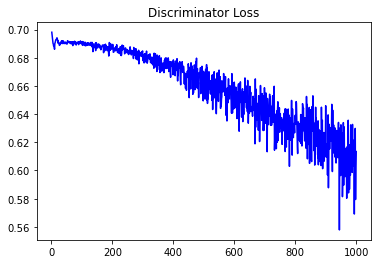

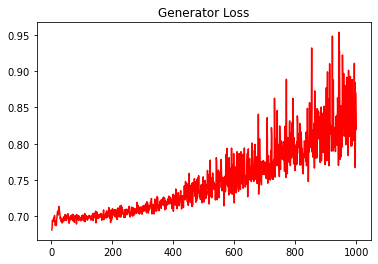

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.36310115895047784


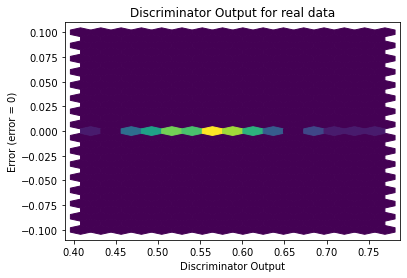

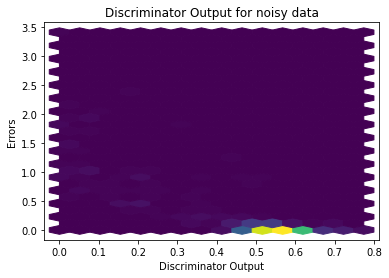

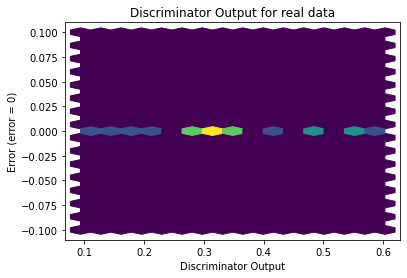

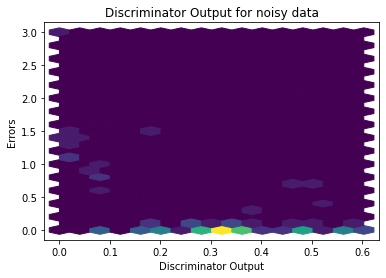

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


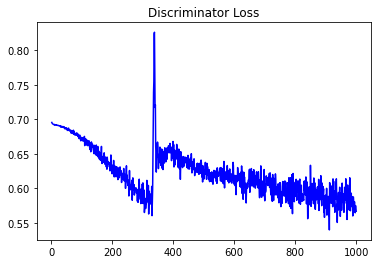

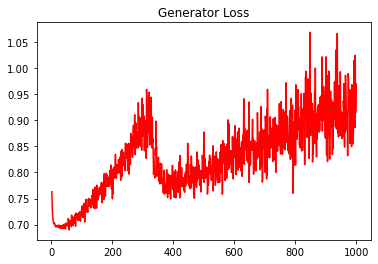

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5339307545898482


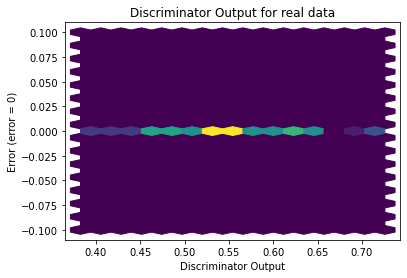

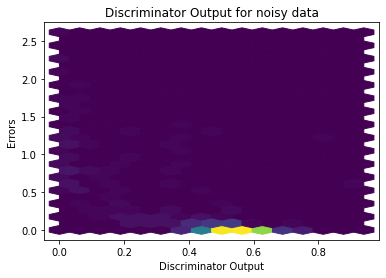

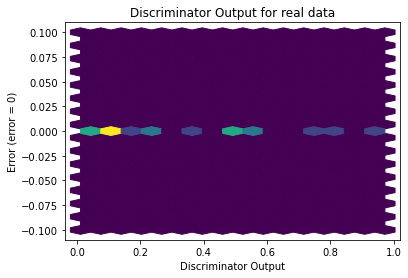

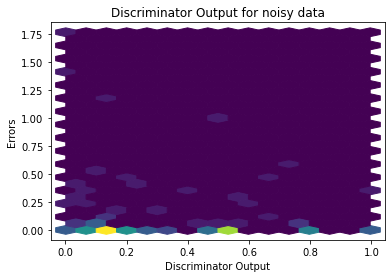

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0929]], requires_grad=True)
